In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

In [ ]:
import os
import numpy as np
import random
os.environ['TF_DETERMINISTIC_OPS'] ='1'
os.environ['TF_CUDNN_DETERMINISTIC']='1'
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)
SEED=1
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Activation
from tensorflow.keras.layers import Dropout,BatchNormalization, Flatten

In [ ]:
from tensorflow.keras.regularizers import l2
reg=l2(0.0002)

In [ ]:
def block(p_bname,p_filters,p_conv):
  for i in range(p_conv):
    model.add(Conv2D(filters=p_filters,kernel_size=(3,3),
             activation='relu',padding='same',kernel_regularizer=reg,
             bias_regularizer=reg,name=p_bname+'_conv'+str(i)))
  model.add(MaxPooling2D(pool_size=(2, 2),name=p_bname+'_pool'))  

In [ ]:
model = Sequential()
model.add(Input(shape=(32, 32,3)))
block(p_bname='B1',p_filters=32,p_conv=2)
block(p_bname='B2',p_filters=64,p_conv=2)
block(p_bname='B3',p_filters=128,p_conv=2)
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_regularizer=reg,
        bias_regularizer=reg))
model.add(Dense(10, activation='softmax',kernel_regularizer=reg,
        bias_regularizer=reg))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 B1_conv0 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 B1_conv1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 B1_pool (MaxPooling2D)      (None, 16, 16, 32)        0         
                                                                 
 B2_conv0 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 B2_conv1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 B2_pool (MaxPooling2D)      (None, 8, 8, 64)          0         
                                                                 
 B3_conv0 (Conv2D)           (None, 8, 8, 128)         7

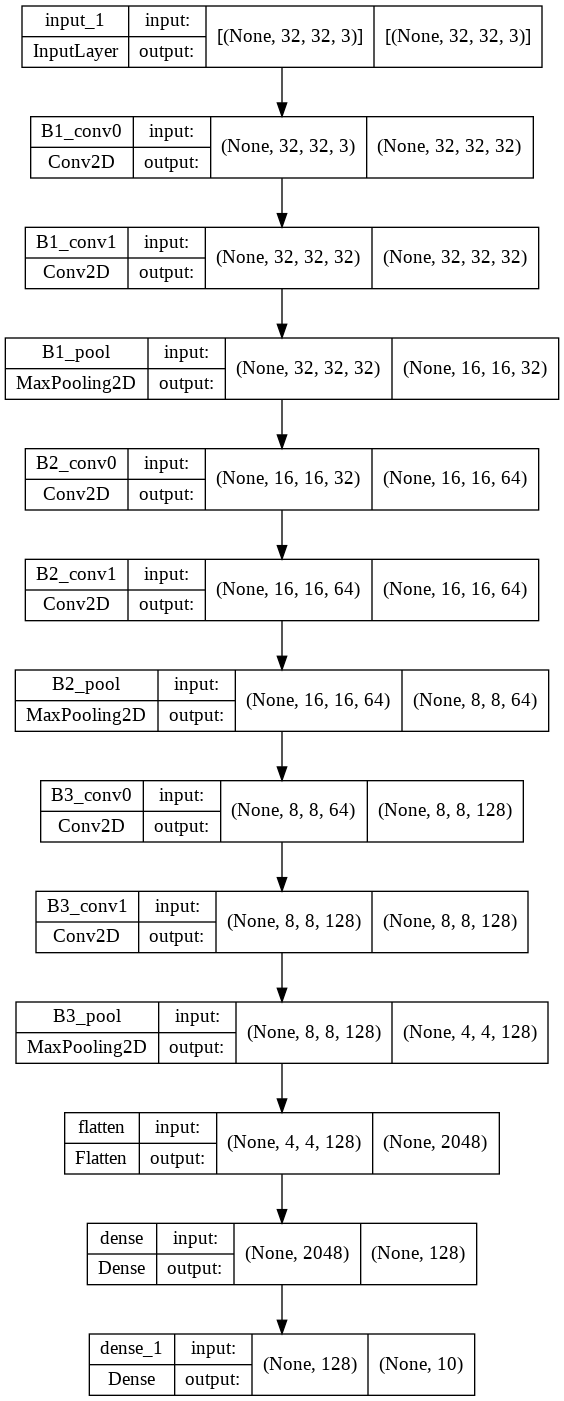

In [ ]:
tf.keras.utils.plot_model(model, 'cifarcnn.png', show_shapes=True)

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=30,verbose=2)       

Epoch 1/30
200/200 - 20s - loss: 1.8098 - acc: 0.3584 - val_loss: 1.5212 - val_acc: 0.4561 - 20s/epoch - 100ms/step
Epoch 2/30
200/200 - 6s - loss: 1.4005 - acc: 0.5141 - val_loss: 1.3211 - val_acc: 0.5508 - 6s/epoch - 28ms/step
Epoch 3/30
200/200 - 6s - loss: 1.1900 - acc: 0.6010 - val_loss: 1.1067 - val_acc: 0.6357 - 6s/epoch - 28ms/step
Epoch 4/30
200/200 - 6s - loss: 1.0385 - acc: 0.6620 - val_loss: 1.0304 - val_acc: 0.6652 - 6s/epoch - 30ms/step
Epoch 5/30
200/200 - 6s - loss: 0.9270 - acc: 0.7050 - val_loss: 0.9243 - val_acc: 0.7092 - 6s/epoch - 30ms/step
Epoch 6/30
200/200 - 6s - loss: 0.8686 - acc: 0.7291 - val_loss: 0.9304 - val_acc: 0.7070 - 6s/epoch - 30ms/step
Epoch 7/30
200/200 - 6s - loss: 0.7889 - acc: 0.7585 - val_loss: 0.8831 - val_acc: 0.7301 - 6s/epoch - 30ms/step
Epoch 8/30
200/200 - 6s - loss: 0.7301 - acc: 0.7842 - val_loss: 0.8837 - val_acc: 0.7345 - 6s/epoch - 31ms/step
Epoch 9/30
200/200 - 6s - loss: 0.6816 - acc: 0.8018 - val_loss: 0.8507 - val_acc: 0.7442 - 6

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

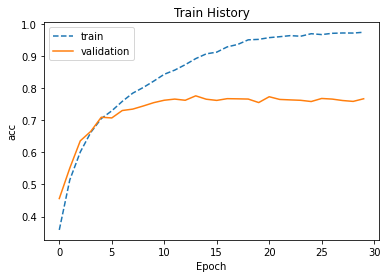

In [ ]:
show_train_history(train_history,'acc','val_acc')

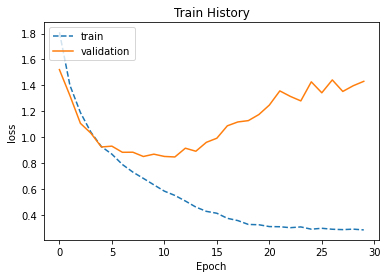

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 2s - loss: 1.4382 - acc: 0.7629 - 2s/epoch - 6ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 1.4382456541061401 test_acc= 0.7628999948501587


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 8, 8, ..., 5, 4, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={
    0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
    5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

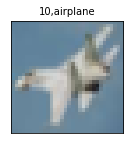

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,[],idx=10,num=1)

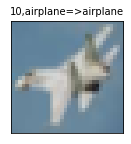

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

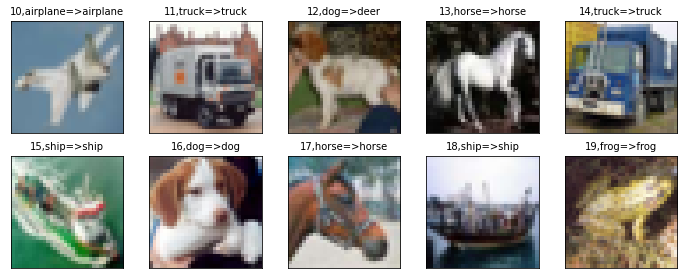

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
  images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

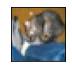

label: cat
predict: cat
airplane   Probability:0.000000000
automobile Probability:0.000000006
bird       Probability:0.000000000
cat        Probability:0.999987602
deer       Probability:0.000000002
dog        Probability:0.000012239
frog       Probability:0.000000006
horse      Probability:0.000000000
ship       Probability:0.000000171
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

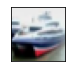

label: ship
predict: ship
airplane   Probability:0.000002048
automobile Probability:0.000000486
bird       Probability:0.000000000
cat        Probability:0.000000000
deer       Probability:0.000000000
dog        Probability:0.000000000
frog       Probability:0.000000000
horse      Probability:0.000000000
ship       Probability:0.999997497
truck      Probability:0.000000008


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(
    index=y_test_label,columns=prediction,
    rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,803,11,37,13,17,8,6,18,59,28
1,12,846,3,5,3,3,10,5,32,81
2,60,6,642,51,81,46,54,35,11,14
3,19,7,61,575,57,120,55,67,18,21
4,12,1,56,47,726,24,51,76,6,1
5,14,2,37,182,45,599,27,80,8,6
6,5,2,34,58,27,10,834,13,10,7
7,9,1,23,29,36,29,4,852,6,11
8,44,14,6,9,6,3,5,6,885,22


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[803,  11,  37,  13,  17,   8,   6,  18,  59,  28],
       [ 12, 846,   3,   5,   3,   3,  10,   5,  32,  81],
       [ 60,   6, 642,  51,  81,  46,  54,  35,  11,  14],
       [ 19,   7,  61, 575,  57, 120,  55,  67,  18,  21],
       [ 12,   1,  56,  47, 726,  24,  51,  76,   6,   1],
       [ 14,   2,  37, 182,  45, 599,  27,  80,   8,   6],
       [  5,   2,  34,  58,  27,  10, 834,  13,  10,   7],
       [  9,   1,  23,  29,  36,  29,   4, 852,   6,  11],
       [ 44,  14,   6,   9,   6,   3,   5,   6, 885,  22],
       [ 19,  52,   6,  12,   9,   1,   2,  17,  15, 867]])

In [ ]:
cm_mat.sum(axis=0)

array([ 997,  942,  905,  981, 1007,  843, 1048, 1169, 1050, 1058])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm 

array([[0.803, 0.011, 0.037, 0.013, 0.017, 0.008, 0.006, 0.018, 0.059,
        0.028],
       [0.012, 0.846, 0.003, 0.005, 0.003, 0.003, 0.01 , 0.005, 0.032,
        0.081],
       [0.06 , 0.006, 0.642, 0.051, 0.081, 0.046, 0.054, 0.035, 0.011,
        0.014],
       [0.019, 0.007, 0.061, 0.575, 0.057, 0.12 , 0.055, 0.067, 0.018,
        0.021],
       [0.012, 0.001, 0.056, 0.047, 0.726, 0.024, 0.051, 0.076, 0.006,
        0.001],
       [0.014, 0.002, 0.037, 0.182, 0.045, 0.599, 0.027, 0.08 , 0.008,
        0.006],
       [0.005, 0.002, 0.034, 0.058, 0.027, 0.01 , 0.834, 0.013, 0.01 ,
        0.007],
       [0.009, 0.001, 0.023, 0.029, 0.036, 0.029, 0.004, 0.852, 0.006,
        0.011],
       [0.044, 0.014, 0.006, 0.009, 0.006, 0.003, 0.005, 0.006, 0.885,
        0.022],
       [0.019, 0.052, 0.006, 0.012, 0.009, 0.001, 0.002, 0.017, 0.015,
        0.867]])

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.803,0.011,0.037,0.013,0.017,0.008,0.006,0.018,0.059,0.028
automobile,0.012,0.846,0.003,0.005,0.003,0.003,0.010,0.005,0.032,0.081
bird,0.060,0.006,0.642,0.051,0.081,0.046,0.054,0.035,0.011,0.014
cat,0.019,0.007,0.061,0.575,0.057,0.120,0.055,0.067,0.018,0.021
deer,0.012,0.001,0.056,0.047,0.726,0.024,0.051,0.076,0.006,0.001
dog,0.014,0.002,0.037,0.182,0.045,0.599,0.027,0.080,0.008,0.006
frog,0.005,0.002,0.034,0.058,0.027,0.010,0.834,0.013,0.010,0.007
horse,0.009,0.001,0.023,0.029,0.036,0.029,0.004,0.852,0.006,0.011
ship,0.044,0.014,0.006,0.009,0.006,0.003,0.005,0.006,0.885,0.022
truck,0.019,0.052,0.006,0.012,0.009,0.001,0.002,0.017,0.015,0.867


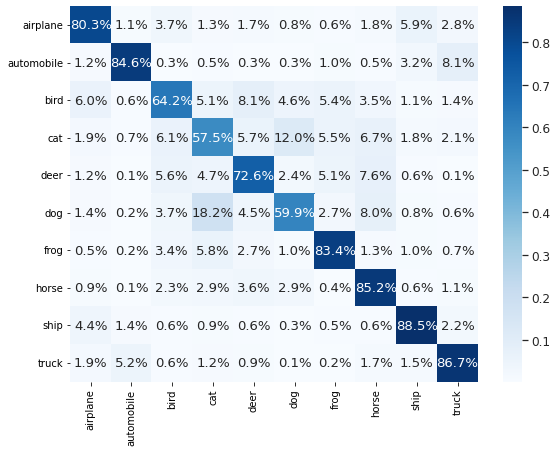

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#heatmap_confusion_matrix

In [ ]:
class_names=[
  "airplane","automobile","bird","cat","deer",
  "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

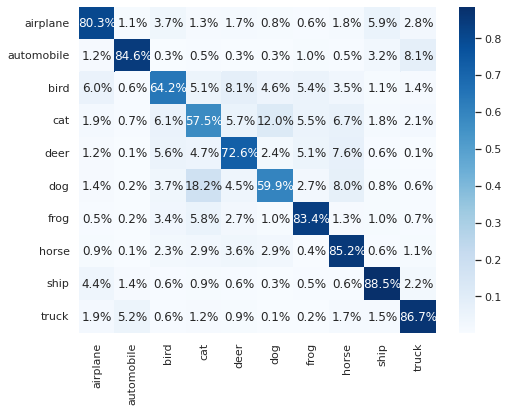

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
232,5,3
238,5,3
262,5,3
275,5,3
...,...,...
9654,5,3
9774,5,3
9823,5,3
9985,5,3


# 查看預測錯誤資料

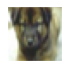

label: dog
predict: dog
airplane   Probability:0.000000000
automobile Probability:0.000000013
bird       Probability:0.000023254
cat        Probability:0.078732677
deer       Probability:0.000261681
dog        Probability:0.917706370
frog       Probability:0.003274391
horse      Probability:0.000000003
ship       Probability:0.000001512
truck      Probability:0.000000031


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,33)

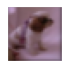

label: dog
predict: dog
airplane   Probability:0.000000316
automobile Probability:0.000000001
bird       Probability:0.000000201
cat        Probability:0.002581807
deer       Probability:0.000003061
dog        Probability:0.997413099
frog       Probability:0.000000402
horse      Probability:0.000001201
ship       Probability:0.000000001
truck      Probability:0.000000000


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,178)